Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 5 - Regressão e Classificação com Modelos Lineares

Nome: Wilson Castello Branco Neto

Exemplo 1: Regressão linear simples com dados fictícios

Importa as classes necessárias e monta o drive para acessar os datasets.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


Lê o arquivo com os dados de treinamento e apresenta os valores dos 10 primeiros registros.

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mineração de Dados/Aula5/Aula5Ex1Dados.csv')
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
995,71.0,68.545888
996,46.0,47.334876
997,55.0,54.090637
998,62.0,63.297171


Verifica se existe algum valor nulo no conjunto.

In [ ]:
df.isna().sum()

,0
x,0
y,1


Como existe um valor nulo na coluna y, elimina o(s) registro(s) com valor(es) nulo(s). Em seguida apresenta as estatísticas básicas dos dados lidos.

In [ ]:
df.dropna(inplace=True)
df.describe()

,x,y
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


Apresenta o diagrama de dispersão dos dados



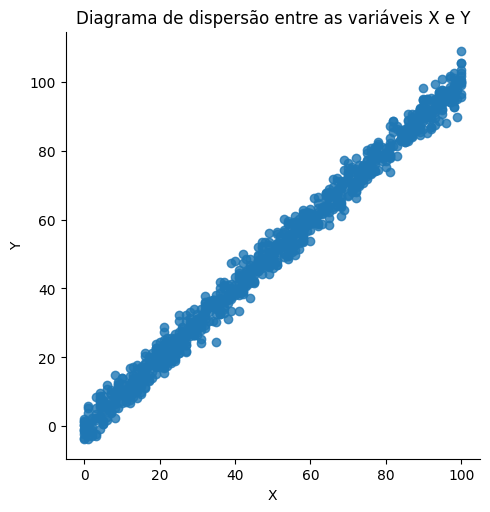

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=df, x = 'x', y = 'y',)
plt.title('Diagrama de dispersão entre as variáveis X e Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1. Divide os dados sendo 67% para treinamento e 33% para teste (use  random_state=42);
2. Cria e treina o modelo de regressão linear, a partir dos dados de treinamento;
3. Calcula os valores do conjunto de teste;
4. Apresenta os coeficientes da reta;
5. Calcula e apresenta o coeficiente de determinação (r2).
6. Calcula e apresenta o erro médio quadrado (mse).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(['y'] ,axis='columns')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
w1 = modelo.coef_
w0 =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Reta {w1[0]:.3f}x +  {w0:.3f}')
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Reta 1.006x +  -0.218
Coeficiente de determinação:  0.990112905486251
Erro quadrado médio:  8.378111684375032


In [ ]:
y_pred

array([ 41.01206988,  60.11857592,  52.07373127,  20.89995825,
        71.18023732,  77.21387081,   3.80466337,   7.8270857 ,
         8.83269128,  48.05130895,  56.0961536 ,  81.23629313,
        66.15220941,  43.02328104,  51.06812569,  20.89995825,
        47.04570337,  66.15220941,  64.14099825,  58.10736476,
        34.97843639,  31.96161965,  57.10175918,  26.93359174,
        74.19705406,  16.87753593,  77.21387081,  99.3371936 ,
        15.87193035,  58.10736476,   2.79905779,  34.97843639,
        74.19705406,  18.88874709,  44.02888662,  58.10736476,
       100.34279918,  25.92798616,  58.10736476,   1.79345221,
        43.02328104,  99.3371936 ,   4.81026895,  48.05130895,
        51.06812569,  42.01767546,  98.33158801,  27.93919732,
         6.82148011,  36.98964755,  63.13539267,  23.916775  ,
        65.14660383,  54.08494244,   3.80466337,   5.81587453,
        15.87193035,  90.28674336,  49.05691453,  69.16902616,
        13.86071918,  12.8551136 ,  56.0961536 ,  43.02

In [ ]:
X

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
995,71.0
996,46.0
997,55.0
998,62.0


In [ ]:
y

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
995,68.545888
996,47.334876
997,54.090637
998,63.297171


In [ ]:
X_train

,x
312,32.0
606,86.0
440,64.0
0,24.0
317,77.0
...,...
106,71.0
271,51.0
861,46.0
436,87.0


In [ ]:
X_test

,x
454,41.0
794,60.0
209,52.0
310,21.0
741,71.0
...,...
932,88.0
484,20.0
979,23.0
133,68.0


In [ ]:
y_train

,y
312,33.674160
606,83.281990
440,66.095634
0,21.549452
317,76.245032
...,...
106,74.831350
271,46.943627
861,46.110211
436,85.593087


In [ ]:
y_test

,y
454,33.306389
794,60.910543
209,52.247600
310,27.305118
741,68.167248
...,...
932,87.369389
484,20.728950
979,18.313968
133,64.057102


Apresenta o diagrama de dispersão dos dados de teste em preto e os valores preditos em vermelho.

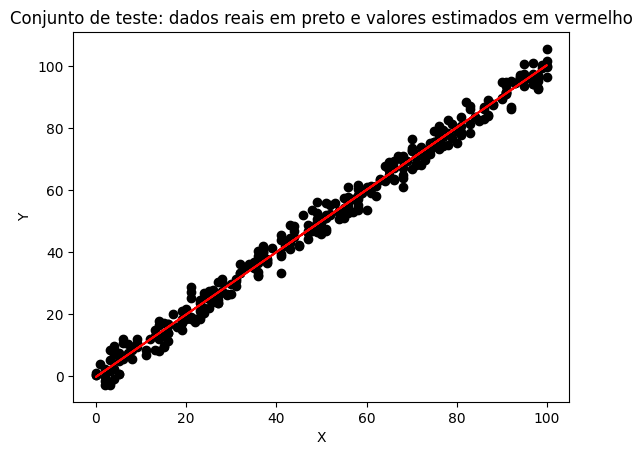

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred,color='red')
plt.title('Conjunto de teste: dados reais em preto e valores estimados em vermelho')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Calcula os valores resultantes, com base no modelo gerado.

In [ ]:
x_novos = [[10],[20],[30]];
y_novos = modelo.predict(x_novos)
print(y_novos)

[ 9.83829686 19.89435267 29.95040849]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
